In [ ]:
import torch
from torch import nn
from matplotlib import pyplot as plt

In [ ]:
w = 0.65
b = 1-w

In [ ]:
w,b

(0.65, 0.35)

In [ ]:
X = torch.arange(0,1,0.03).unsqueeze(1)
X.shape

torch.Size([34, 1])

In [ ]:
#y = X*w + b
y = X*w+b
y.shape

torch.Size([34, 1])

In [ ]:
#making model
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__();
    self.weight = nn.Parameter(torch.rand(1,requires_grad=True,dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1,requires_grad=True,dtype = torch.float))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return x*self.weight + self.bias

In [ ]:
torch.manual_seed(42)
lr = LinearRegression()
lr.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
#train_test_split
split = (int)(0.75*len(X))
split

25

In [ ]:
X_train,y_train = X[:split],y[:split]
X_test,y_test = X[split:],y[split:]

In [ ]:
def plot(X_train,X_test,y_train,y_test,pred = None):
  plt.figure(figsize=(14,10))
  plt.scatter(X_train,y_train,label="Training")
  plt.scatter(X_test,y_test,label="Testing")

  if pred is not None:
    plt.scatter(X_test,pred,label="Predictions")

  plt.legend(prop={"size":14})
  plt.show()

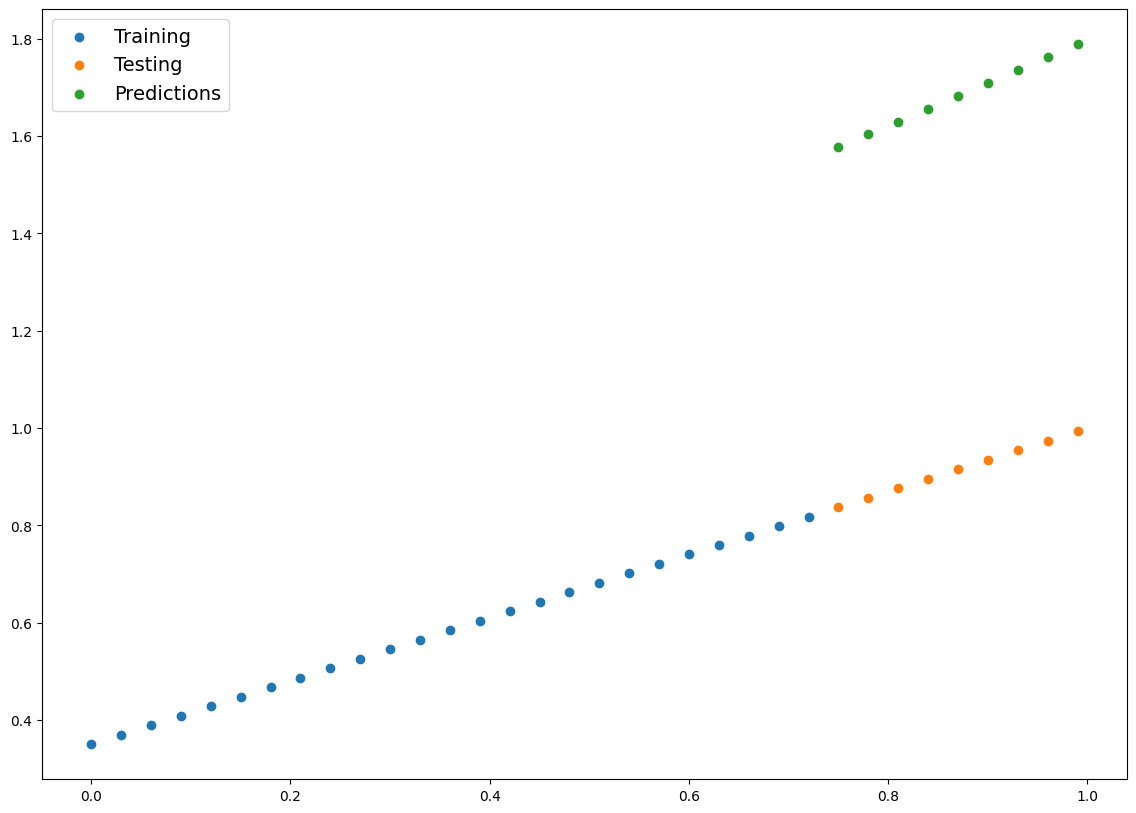

In [ ]:
with torch.inference_mode():
  initial_pred = lr(X_test)
plot(X_train,X_test,y_train,y_test,initial_pred)

In [ ]:
loss_fnc = nn.L1Loss()
optimizer = torch.optim.SGD(lr.parameters(),lr=0.01)

In [ ]:
epochs = 200
epoch_count = []
train_loss = []
test_loss = []

for epoch in range(epochs):
  lr.train()

  y_pred = lr(X_train)

  loss_train = loss_fnc(y_pred,y_train)

  optimizer.zero_grad()

  loss_train.backward()

  optimizer.step()

  lr.eval()

  with torch.inference_mode():
    test_pred = lr(X_test)
    loss_test = loss_fnc(test_pred,y_test)

  if epoch%10 == 0:
    epoch_count.append(epoch)
    train_loss.append(loss_train)
    test_loss.append(loss_test)

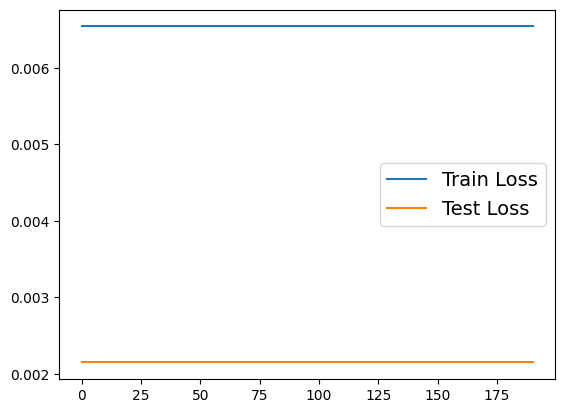

In [ ]:
import numpy as np
plt.plot(epoch_count,np.array(torch.stack(train_loss).detach().numpy()),label="Train Loss")
plt.plot(epoch_count,np.array(torch.stack(test_loss).detach().numpy()),label="Test Loss")
plt.legend(prop={"size":14})
plt.show()

In [ ]:
w,b

(0.65, 0.35)

In [ ]:
lr.state_dict()

OrderedDict([('weight', tensor([0.6587])), ('bias', tensor([0.3534]))])

In [ ]:
with torch.inference_mode():
  pred = lr(X_test)

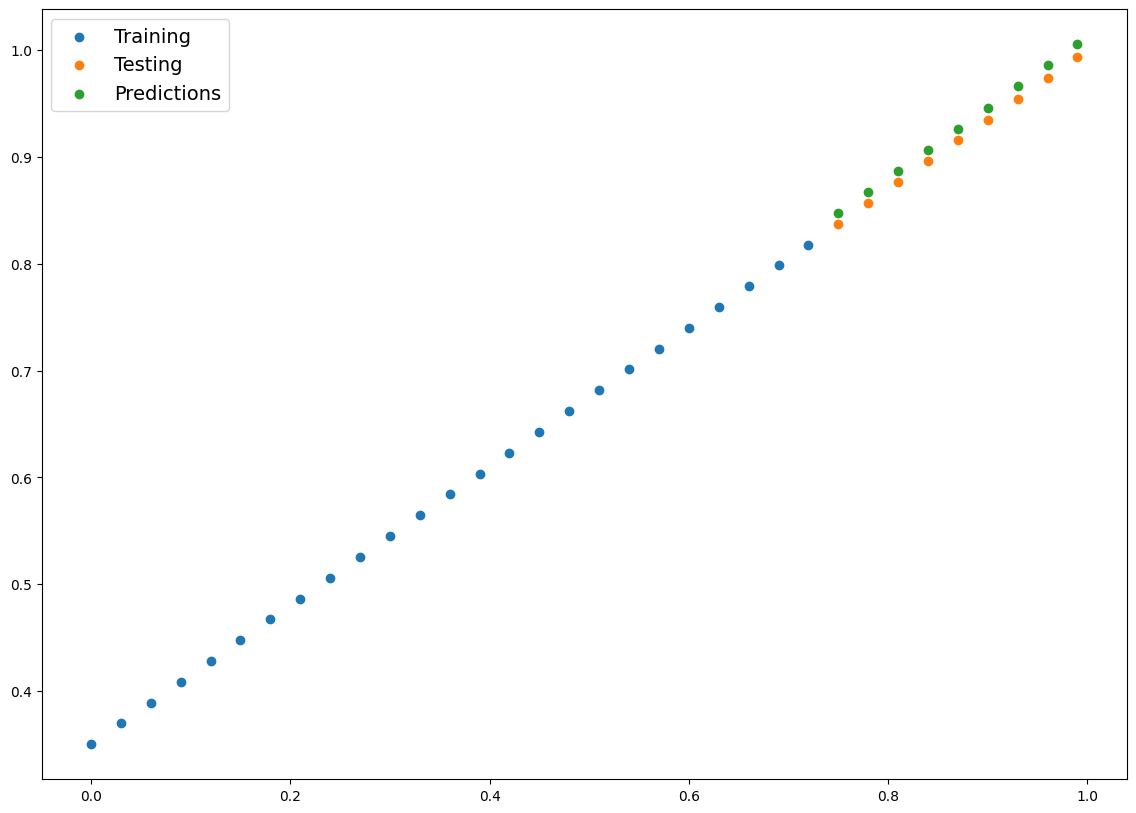

In [ ]:
plot(X_train,X_test,y_train,y_test,pred)

In [ ]:
#Saving model
from pathlib import Path

model_dir = Path("models")
model_dir.mkdir(parents=True,exist_ok=True)

model_path = "1_model.pth"

path_url = model_dir/model_path
path_url

PosixPath('models/1_model.pth')

In [ ]:
torch.save(lr.state_dict(),path_url)
print(f"Saving model in path: {path_url}")

Saving model in path: models/1_model.pth


In [ ]:
# Loading Path
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load(path_url))

<All keys matched successfully>

In [ ]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.6587])), ('bias', tensor([0.3534]))])

In [ ]:
# Making Prediction
loaded_model.eval()
with torch.inference_mode():
  loaded_model_pred = loaded_model(X_test)

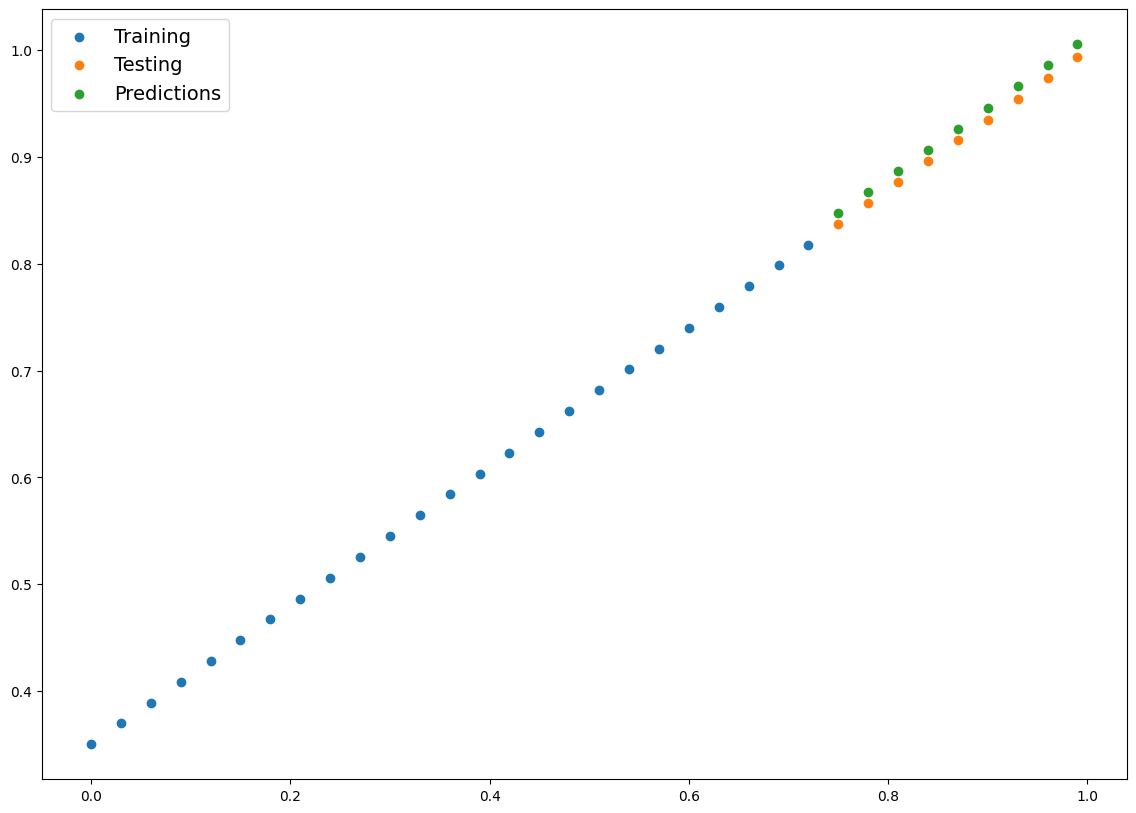

In [ ]:
plot(X_train,X_test,y_train,y_test,loaded_model_pred)